# Цель лабораторной работы

Изучение различных методов визуализация данных и создание истории на основе данных.

# Задание:

1. Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.

2. Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

3. Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:

    - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
    - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

4. Сформировать отчет и разместить его в своем репозитории на github.

#About Dataset
Context

A complete list of unicorn companies in the world.

Content

A unicorn company, or unicorn startup, is a private company with a valuation over $1 billion. As of March 2022, there are 1,000 unicorns around the world. Popular former unicorns include Airbnb, Facebook and Google. Variants include a decacorn, valued at over $10 billion, and a hectocorn, valued at over $100 billion. Download the full list today to see each company's valuation, investors, and more.

#Импортирование необходимых библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

Импортирование необходимого набора данных¶

In [2]:
df = pd.read_csv('Unicorn_Companies.csv')
df.columns = ['Company', 'Valuation', 'Date_Joined', 'Country', 'City', 'Industry', 'Select_Inverstors', 'Founded_Year', 'Total_Raised', 'Financial_Stage', 'Investors_Count', 'Deal_Terms', 'Portfolio_Exits']
df["Valuation"] = df["Valuation"].replace({"\$": ""}, regex=True)
df["Valuation"] = df["Valuation"].astype(float)


In [3]:
#Основная информация о наборе данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation          1037 non-null   float64
 2   Date_Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select_Inverstors  1037 non-null   object 
 7   Founded_Year       1037 non-null   object 
 8   Total_Raised       1037 non-null   object 
 9   Financial_Stage    1037 non-null   object 
 10  Investors_Count    1037 non-null   object 
 11  Deal_Terms         1037 non-null   object 
 12  Portfolio_Exits    1037 non-null   object 
dtypes: float64(1), object(12)
memory usage: 105.4+ KB


In [5]:
df.head()

,Company,Valuation,Date_Joined,Country,City,Industry,Select_Inverstors,Founded_Year,Total_Raised,Financial_Stage,Investors_Count,Deal_Terms,Portfolio_Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


Простая обработка набора данных. Удаление элементов с отсутствующими данными.

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation          1037 non-null   float64
 2   Date_Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select_Inverstors  1037 non-null   object 
 7   Founded_Year       1037 non-null   object 
 8   Total_Raised       1037 non-null   object 
 9   Financial_Stage    1037 non-null   object 
 10  Investors_Count    1037 non-null   object 
 11  Deal_Terms         1037 non-null   object 
 12  Portfolio_Exits    1037 non-null   object 
dtypes: float64(1), object(12)
memory usage: 113.4+ KB


#Информация

In [7]:
bar_df = df['Industry'].value_counts()
bar_df.head()

Fintech                            205
Internet software & services       192
E-commerce & direct-to-consumer    107
Artificial intelligence             71
Health                              69
Name: Industry, dtype: int64

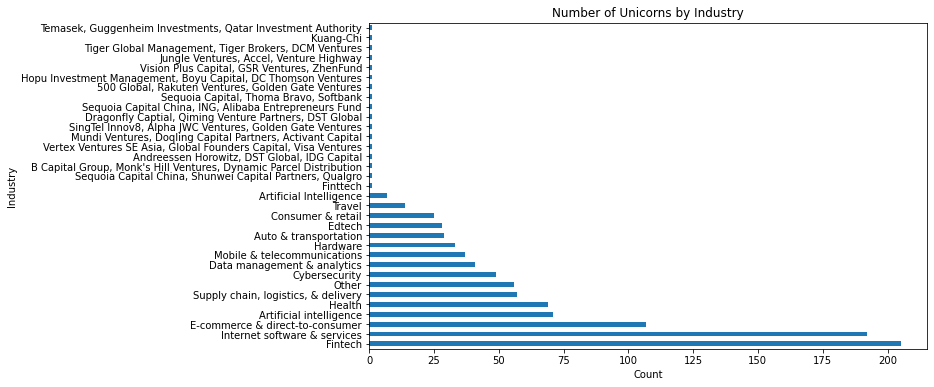

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax = df['Industry'].value_counts().plot(kind='barh')
ax.set(xlabel='Count', ylabel='Industry', title='Number of Unicorns by Industry')
plt.show()

#Количество единорогов широко варьируется в зависимости от отрасли.

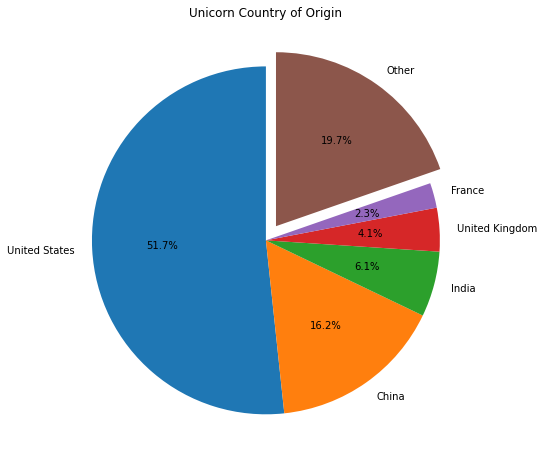

In [9]:
sizes = df['Country'].value_counts()[:5]
sumOther = df['Country'].value_counts()[5:].sum()
sizes2 = pd.Series(np.concatenate((sizes.values, [sumOther])))
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes2, explode=(0,0,0,0,0,0.1), labels=['United States', 'China', 'India', 'United Kingdom', 'France', 'Other'], 
        autopct='%1.1f%%', startangle=90)
ax1.set(title='Unicorn Country of Origin')
plt.show()

#Количество единорогов в разных странах сильно различается, а в США и Китае их много.

<AxesSubplot:title={'center':'Top five Countries'}, xlabel='Country', ylabel='Valuation'>

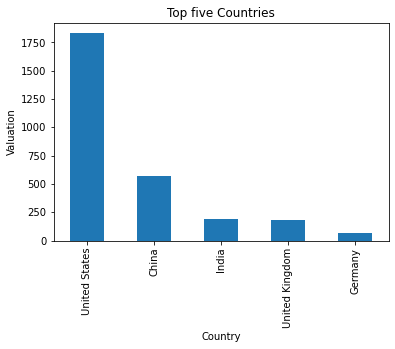

In [10]:
country_df = df.groupby('Country')
ax2 = country_df['Valuation'].sum().sort_values(ascending=False)[:5]
ax2.plot(kind='bar', title='Top five Countries', ylabel='Valuation')

#Китайские и американские единороги создают наибольшую ценность

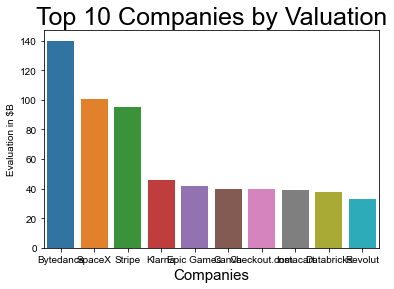

In [11]:
info = pd.DataFrame(df['Valuation'].sort_values(ascending =False))
info['Company'] = df['Company']
data = list(map(str,(info['Company'])))
x = list(data[:10])
y= list(info['Valuation'][:10])

ax = sns.barplot(x=x, y=y)

sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Top 10 Companies by Valuation', fontsize=25)
ax.set_xlabel('Companies',fontsize=15)
ax.set_ylabel('Evaluation in $B',fontsize = 10)

sns.set_style('darkgrid')

#Есть три единорога, которые создают большую ценность

<AxesSubplot:title={'center':'Valuation'}, xlabel='Country'>

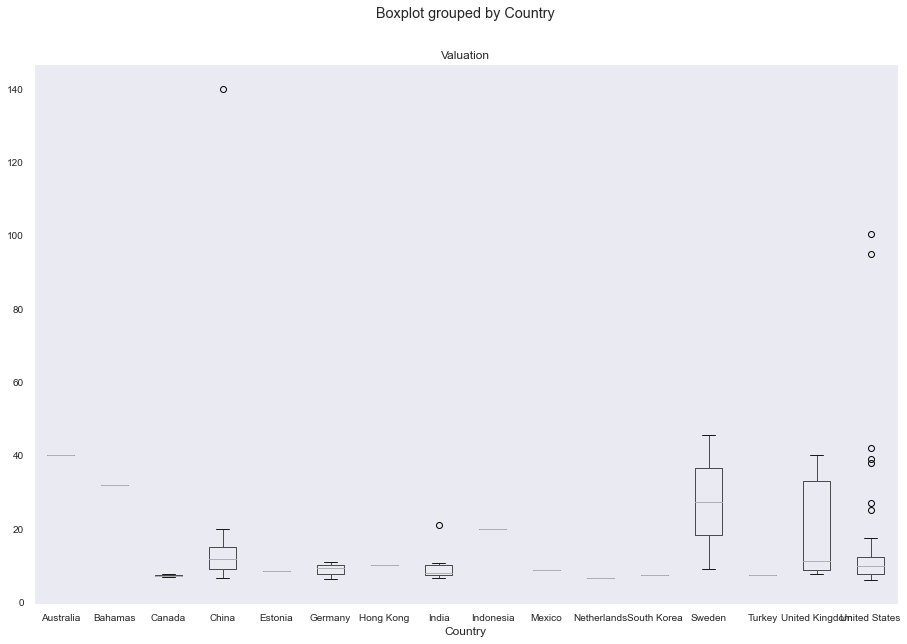

In [12]:
df2=df.sort_values(by='Valuation',ascending=False)
df2=df2.head(100)
df2.boxplot(column='Valuation',by='Country',fontsize=10,grid=False,figsize=(15,10))

Для 100 лучших единорогов разница между Великобританией и Швецией относительно велика.

#Список литературы
[1] Гапанюк Ю. Е. Лабораторная работа «Разведочный анализ данных. Исследование и визуализация данных» [Электронный ресурс] // GitHub. –– 2019. –– Режим доступа: https://github.com/ugapanyuk/ml_course/wiki/LAB_EDA_VISUALIZATION (дата обращения: 13.02.2019)
[2] https://archive.ics.uci.edu/ml/machine-learning-databases/adult/